Christopher Zdyrski Python Assignment
Due: 5/5/2021
Github repository with neccesary files
https://github.com/czdyrski/BCB546-PythonHW_Spring2021

Install and import necessary packages

In [229]:
#Confirm that python, biopython, and seaborn are installed and up to date
#import packages
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd
import matplotlib.pyplot as plt

Function #1 Retrieve Sequences
It gets sequence data from a fasta file type

In [230]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
        
    return(sequence_data_dict)

Function #2 String translates a string of nucleotides to amino acids

In [231]:
def translate_function(string_nucleotides): 
    
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    
    #Make a blank variable to hold amino acid seqence
    #For loop to cycle through each codon do this by groups of 3's

    raw_codon = [string_nucleotides[i:i+3] for i in range(0, len(string_nucleotides), 3)]
    
    aa_seq_string = []
                                                                                 
    #For loop to search for the word "stop" codon
    for location in raw_codon:
        aa = mito_table.forward_table.get(location, "Stop")
        if aa == "Stop":
            break
        else:
            aa_seq_string.append(aa)

    #Saw how to concatenate the list on Stack Overflow
    #https://stackoverflow.com/questions/4166641/how-can-i-optimally-concat-a-list-of-chars-to-a-string
    
    #Return amino acids translated from nucleotides
    return(''.join(aa_seq_string))       

Function #3 Alternative translation function 

In [232]:
#CHECK THIS FUNCTION
#Biopython tutorial and help
#https://biopython.org/docs/1.75/api/Bio.Seq.html

def alternative_translation_function(string_nucleotides): 
    
    #For the table option and to_stop
    #https://biopython.org/wiki/Seq
    x = string_nucleotides.translate(table=2, to_stop=True)
    
    return(x)

In [233]:
#test
test = "TATTTTATTTTTTTGCAGTACG"
translate_function(test)


'YFIFLQY'

Function #4 Calculates the molecular weight of each amino acid sequence

In [234]:
#Function takes in an amino acid sequence as a strong and outputs a moleuclar weight as a double
def compute_molecular_weight(aa_seq):
    
        #The ProtParam functions requires aa_seq to be a string
        #Ran the ProteinAnalysis() function on aa_seq
        protein_analysis_output = ProteinAnalysis(str(aa_seq))

        mol_weight = protein_analysis_output.molecular_weight()
        
        #Return the molecular weight
        return(mol_weight)

Function #5 Computes the GC-content of each DNA sequence

In [235]:
#Function takes in a DNA sequence and returns the GC content as a double
#Setup loop from this resource
#https://www.w3schools.com/python/python_for_loops.asp

def compute_gc_content(dna_seq):
    
    i = 0
    gc_total = 0
    
    for i in dna_seq:

        #Count if nucleotide is either G or C
        if ((i == "G") or (i == "C")):
            gc_total = gc_total + 1

    #Divide the total GC content by the length of the DNA sequence and multiply it by 100
    gc_content = ((gc_total) / (len(dna_seq))) * 100
    
    #Rerturn the proprotion of GC in the total sequence
    return(gc_content)

Main

In [236]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 

bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass 
species_list = list(bears_df.species)

Step 6: Add columns

In [237]:
#Used this reosurce to add new column quickly
#https://re-thought.com/how-to-add-new-columns-in-a-dataframe-in-pandas/

print(bears_df)
bears_df['Molecular_Weight'] = 'NaN'
bears_df['GC_content'] = 'NaN'
print(bears_df)

                  species     mass
0          Ursus spelaeus  550.800
1            Ursus arctos  203.500
2        Ursus thibetanus   99.714
3        Melursus ursinus  100.030
4        Ursus americanus  110.560
5     Helarctos malayanus   47.020
6  Ailuropoda melanoleuca  118.200
7      Tremarctos ornatus  140.700
8         Ursus maritimus  425.100
                  species     mass Molecular_Weight GC_content
0          Ursus spelaeus  550.800              NaN        NaN
1            Ursus arctos  203.500              NaN        NaN
2        Ursus thibetanus   99.714              NaN        NaN
3        Melursus ursinus  100.030              NaN        NaN
4        Ursus americanus  110.560              NaN        NaN
5     Helarctos malayanus   47.020              NaN        NaN
6  Ailuropoda melanoleuca  118.200              NaN        NaN
7      Tremarctos ornatus  140.700              NaN        NaN
8         Ursus maritimus  425.100              NaN        NaN


Step 7: For loop

In [238]:
#Initialize row variable to the first row
row = 0

for key, value in cytb_seqs.items():
    
    aa_seq = translate_function(value)
    #aa_seq = alternative_translation_function(value)
    
    #get the molecular weight of aa_seq and fills in dataframe
    calculated_mol_weight = compute_molecular_weight(aa_seq)
    bears_df.loc[row, "Molecular_Weight"] = calculated_mol_weight
    
    #get the GC content of the DNA sequence and fills in dataframe
    calculated_gc_content = compute_gc_content(value)
    bears_df.loc[row, "GC_content"] = calculated_gc_content
    
    #iterate through the rows
    row = row + 1

    #View dataframe
print(bears_df)

                  species     mass Molecular_Weight GC_content
0          Ursus spelaeus  550.800       42458.7992   43.77193
1            Ursus arctos  203.500       42414.7435   43.77193
2        Ursus thibetanus   99.714       42306.6735  45.614035
3        Melursus ursinus  100.030         42551.99  45.175439
4        Ursus americanus  110.560       42427.7439  43.947368
5     Helarctos malayanus   47.020        42560.891  44.298246
6  Ailuropoda melanoleuca  118.200       42702.1845  40.789474
7      Tremarctos ornatus  140.700       42384.8266  44.385965
8         Ursus maritimus  425.100       42454.7873  44.298246


In [239]:
#Need this line in order to plot in Jupyter notebook or Spyder
#Used the class resource website
#https://eeob-biodata.github.io/BCB546X-python/05-seaborn-viz/

%matplotlib inline

Step 8: Bar-chart

<AxesSubplot:title={'center':'Mass of each Bear Species'}, xlabel='species'>

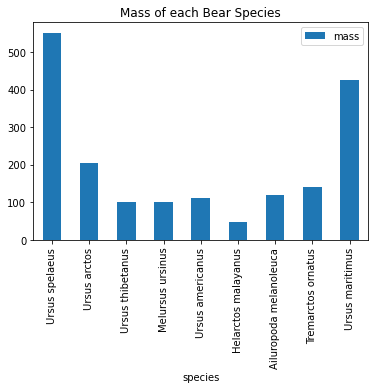

In [240]:
bears_df.plot(x = "species", y = "mass", kind = "bar", title = "Mass of each Bear Species")

Q1: What is the largest bear species?
#The largest species of bear is Ursus spelaeous with a mass of 550.8.
Q2: What else is interesting about this species?
Q2: Its is also interesting that this species went extinct but in 2013 researhcers were able to sequence mitochondrial DNA from a bone fragmetn of an indivdual which dated back more than 300,000 years.
#Source https://www.britannica.com/animal/cave-bear

Step 9: Plot

<AxesSubplot:title={'center':'Molecular weight vs GC content across Bear Species'}, xlabel='Molecular_Weight', ylabel='GC_content'>

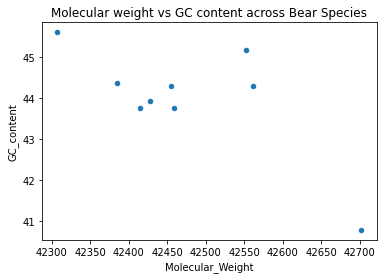

In [241]:
bears_df.plot(x = "Molecular_Weight", y = "GC_content", kind = "scatter", title = "Molecular weight vs GC content across Bear Species")

Step 10: New Dataframe

In [242]:
bears_df.to_csv("bears_mass_cytb.csv")

Step 11: Bonus

In [243]:
#Some other interesting things that can be done include 
#Splitting each Fasta line into its own file
#Scanning the Fasta seqeunces for certain genetic factors (repeats, inverted terminal repeats aka transposons)